In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape


(1338, 7)

In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

Text(0, 0.5, 'Charges')

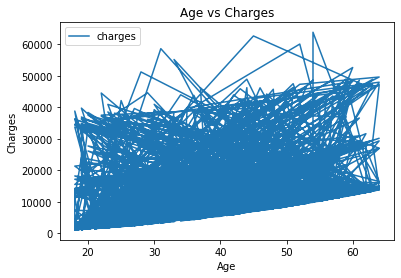

In [8]:
df.plot(x='age',y='charges')
plt.title('Age vs Charges')  
plt.xlabel('Age')  
plt.ylabel('Charges')  

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
X = df['age'].values.reshape(-1,1)
y= df['charges'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regressor.intercept_)

[3882.85867889]


In [14]:
print(regressor.coef_)

[[238.37156961]]


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
daf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
daf

Actual     Predicted
0     9724.53000  16278.180298
1     8547.69130  15086.322450
2    45702.02235  15324.694020
3    12950.07120  18423.524425
4     9644.25250  16039.808729
..           ...           ...
263  15019.76005  18661.895995
264   6664.68595  13656.093033
265  20709.02034  17470.038146
266  40932.42950  11034.005767
267   9500.57305  14847.950881

[268 rows x 2 columns]

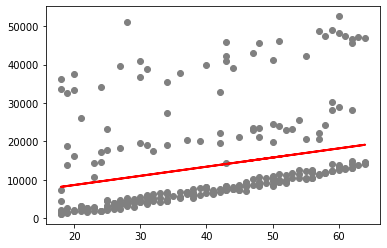

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
metrics.mean_absolute_error(y_test, y_pred)

9147.177402778987

In [19]:
metrics.mean_squared_error(y_test, y_pred)

139176465.01367894

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

11797.30753238547

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
k=pd.get_dummies(df['sex'])
df = pd.concat([df, k], axis=1)
df.drop('sex', axis = 1, inplace=True)
k=pd.get_dummies(df['smoker'])
df = pd.concat([df, k], axis=1)
df.drop('smoker', axis = 1, inplace=True)
k=pd.get_dummies(df['region'])
df = pd.concat([df, k], axis=1)
df.drop('region', axis = 1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   female     1338 non-null   uint8  
 5   male       1338 non-null   uint8  
 6   no         1338 non-null   uint8  
 7   yes        1338 non-null   uint8  
 8   northeast  1338 non-null   uint8  
 9   northwest  1338 non-null   uint8  
 10  southeast  1338 non-null   uint8  
 11  southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [24]:
X=df[['male','female', 'age', 'bmi', 'children', 'yes','no']]

In [25]:
y=df['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
X

male  female  age     bmi  children  yes  no
0        0       1   19  27.900         0    1   0
1        1       0   18  33.770         1    0   1
2        1       0   28  33.000         3    0   1
3        1       0   33  22.705         0    0   1
4        1       0   32  28.880         0    0   1
...    ...     ...  ...     ...       ...  ...  ..
1333     1       0   50  30.970         3    0   1
1334     0       1   18  31.920         0    0   1
1335     0       1   18  36.850         0    0   1
1336     0       1   21  25.800         0    0   1
1337     0       1   61  29.070         0    1   0

[1338 rows x 7 columns]

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3939.780806966829
Mean Squared Error: 32165826.643605124
Root Mean Squared Error: 5671.492452926754


In [31]:
from sklearn.model_selection import cross_val_score

(0, 66902.86239320421)

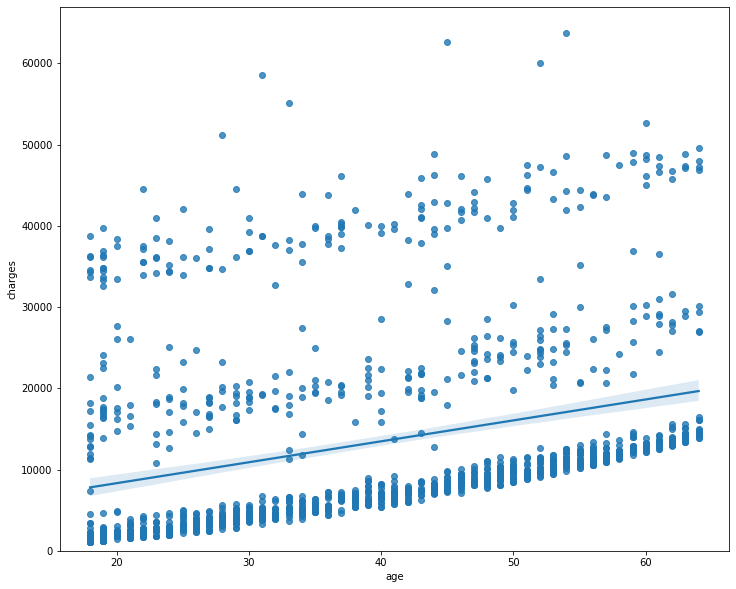

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)

In [35]:
Rcross = cross_val_score(regressor, X_train[['age']], y_train, cv=4)

In [36]:
Rcross

array([0.0373235 , 0.12248736, 0.03751269, 0.08125747])

In [37]:
print("Mean of the folds: ", Rcross.mean(), "\nStandard deviation: " , Rcross.std())

Mean of the folds:  0.06964525458680501 
Standard deviation:  0.03537064158417184


In [40]:
from sklearn.linear_model import Ridge

In [41]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [43]:
Ridge_train_score

0.736138879923067

In [44]:
 Ridge_test_score

0.7978628067129561

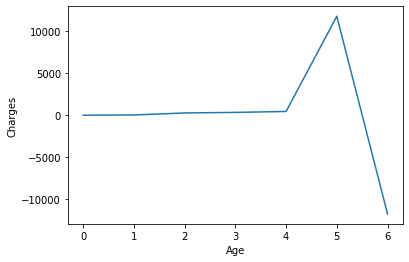

In [54]:
plt.plot(rr.coef_) 
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

In [51]:
train_score 

0.7361388001968052

In [52]:
test_score

0.7978406661616366

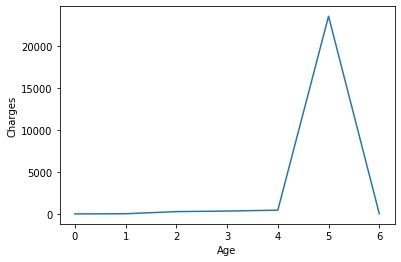

In [55]:
plt.plot(lasso.coef_)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()